  # Predicting heart disease with machine learning
 
 With this nootebook we wil try to predict wheteher or not someone has heart disease based on there medical history.
 The data is taken from Kaggle website-
 Heart Disease UCI
  
https://archive.ics.uci.edu/ml/datasets/Heart+Disease

https://www.kaggle.com/ronitf/heart-disease-uci?select=heart.csv

## Steps of prediction
1. Problem Definition.
2. Data
3. Evaluating 
4. Features
5. Modelling
6. Experamentation.

## 1. Problem definition
Our goal is to predict if a patient has a heart disease

## 2. Data
As specified in the headline
The data is taken from Kaggle website- Heart Disease UCI

https://archive.ics.uci.edu/ml/datasets/Heart+Disease

https://www.kaggle.com/ronitf/heart-disease-uci?select=heart.csv

## 3. Evaluating 
We need to achive 95% of accuracy  at predicting the heart diseas.

## 4. Features
Lets specify the infContext
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

### Content

Attribute Information:

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defectormation about the data:


# Data analysis

In [118]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
# plot appear in the nootebookk
%matplotlib inline 

# Import sckit-learn models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluation 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

In [2]:
## Load the data
df = pd.read_csv("heart.csv")
df.shape

(303, 14)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Check the presenteg of right hart diseas
print("the presenteg of heart diseaes patientsis : ",df["target"].sum()/df.shape[0] * 100,"%")
print("the amount of heart diseas in the dataset is: ",df["target"].sum() )

the presenteg of heart diseaes patientsis :  54.45544554455446 %
the amount of heart diseas in the dataset is:  165


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# Search for null values in the dataset
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

As we can see there are no null values in the data set so we dont nedd to fix any of them.

In [7]:
# Check the numarical attributes and there statistic attributes
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
# Check the infulance of attribute against the target
##compare target against sex
print("The value cout of the sex culomn is:\n",df["sex"].value_counts())
print("\nlets view the influnce on the target:\n",pd.crosstab(df["target"],df["sex"]))

The value cout of the sex culomn is:
 1    207
0     96
Name: sex, dtype: int64

lets view the influnce on the target:
 sex      0    1
target         
0       24  114
1       72   93


We can see from the data there are twices much number of male data and about 75% of the womens have heart diseas.

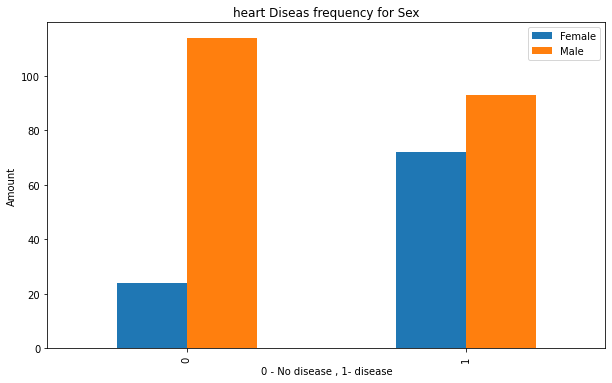

In [9]:
#Plot the crosstab
pd.crosstab(df["target"],df["sex"]).plot(kind = "bar",
                                        figsize = (10,6))
plt.title("heart Diseas frequency for Sex")
plt.xlabel("0 - No disease , 1- disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])

Text(0.5, 1.0, 'Heart Disease in function of heart rate')

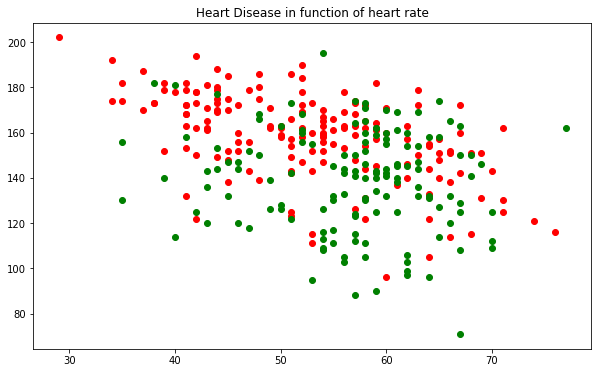

In [10]:
## Compare more then one attribute
plt.figure(figsize = (10,6))

#scatter plot the thalach( the harte rate)
plt.scatter(df["age"][df["target"]==1],
           df["thalach"][df["target"]==1],
           c = 'red')

plt.scatter(df["age"][df["target"]==0],
           df["thalach"][df["target"]==0],
           c = 'green')
plt.title("Heart Disease in function of heart rate")


77


<AxesSubplot:ylabel='Frequency'>

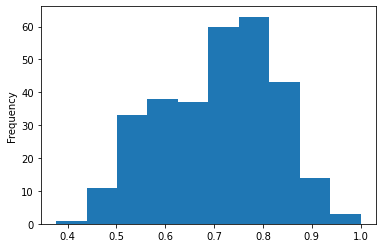

In [11]:
#check the distribution of the daata
print(df.age.max())

# Plote the normelized distrebution of age
(df["age"]/df["age"].max()).plot.hist()

In [12]:
#Heart Disease Frequency per chest pain type
pd.crosstab(df["cp"],df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

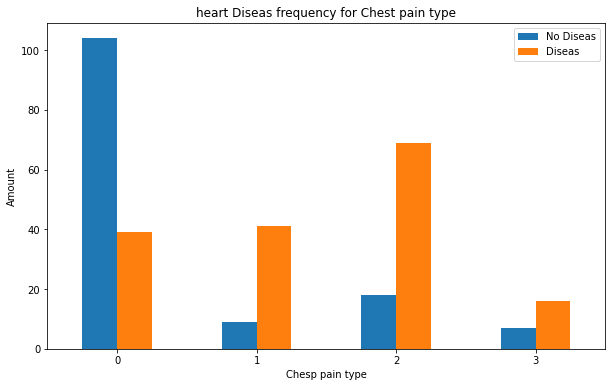

In [13]:
#Plot the crosstab
pd.crosstab(df["cp"],df["target"]).plot(kind = "bar",
                                        figsize = (10,6))
plt.title("heart Diseas frequency for Chest pain type")
plt.xlabel("Chesp pain type")
plt.ylabel("Amount")
plt.legend(["No Diseas","Diseas"])
plt.xticks(rotation = 0)

In [14]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


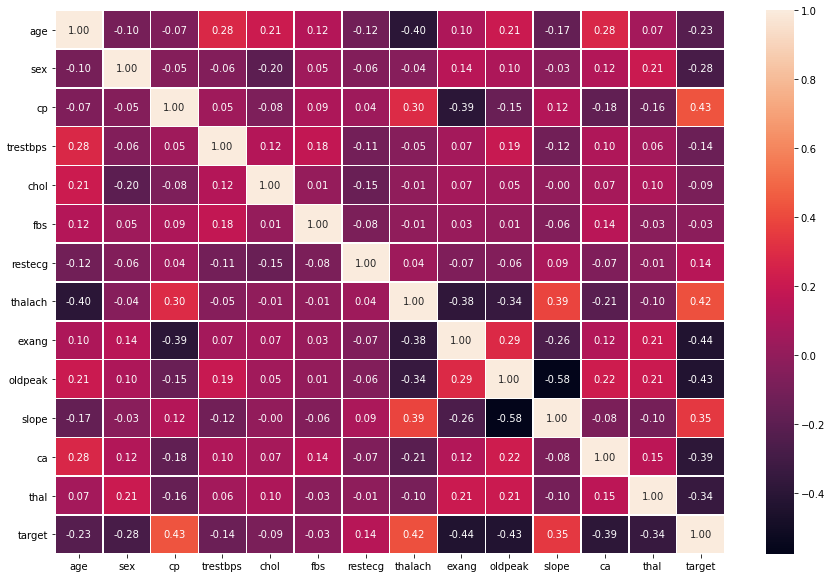

In [16]:
# visualize the correlation , matrix
corr_matrix = df.corr()
fig , ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix,
                annot = True,
                linewidth = 0.5,
                fmt = ".2f")

# Modeling 
Where traing to predict a classification problom from the data.


In [17]:
#Split the data without predictions
X = df.drop(["target"], axis= 1)
y = df["target"]
#Split the data for training and test

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, test_size=0.2, random_state=42)

In [18]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [19]:
y_train.head()

132    1
202    0
196    0
75     1
176    0
Name: target, dtype: int64

## Chossing the right Model
Its time to choose machine learning model.
Were traing to predict a classification problem.

The optional ML models for classification problem are:
1. Logistic Regression
2. KNearest Neighbor
3. Ensamble Classifiers - Random Forest


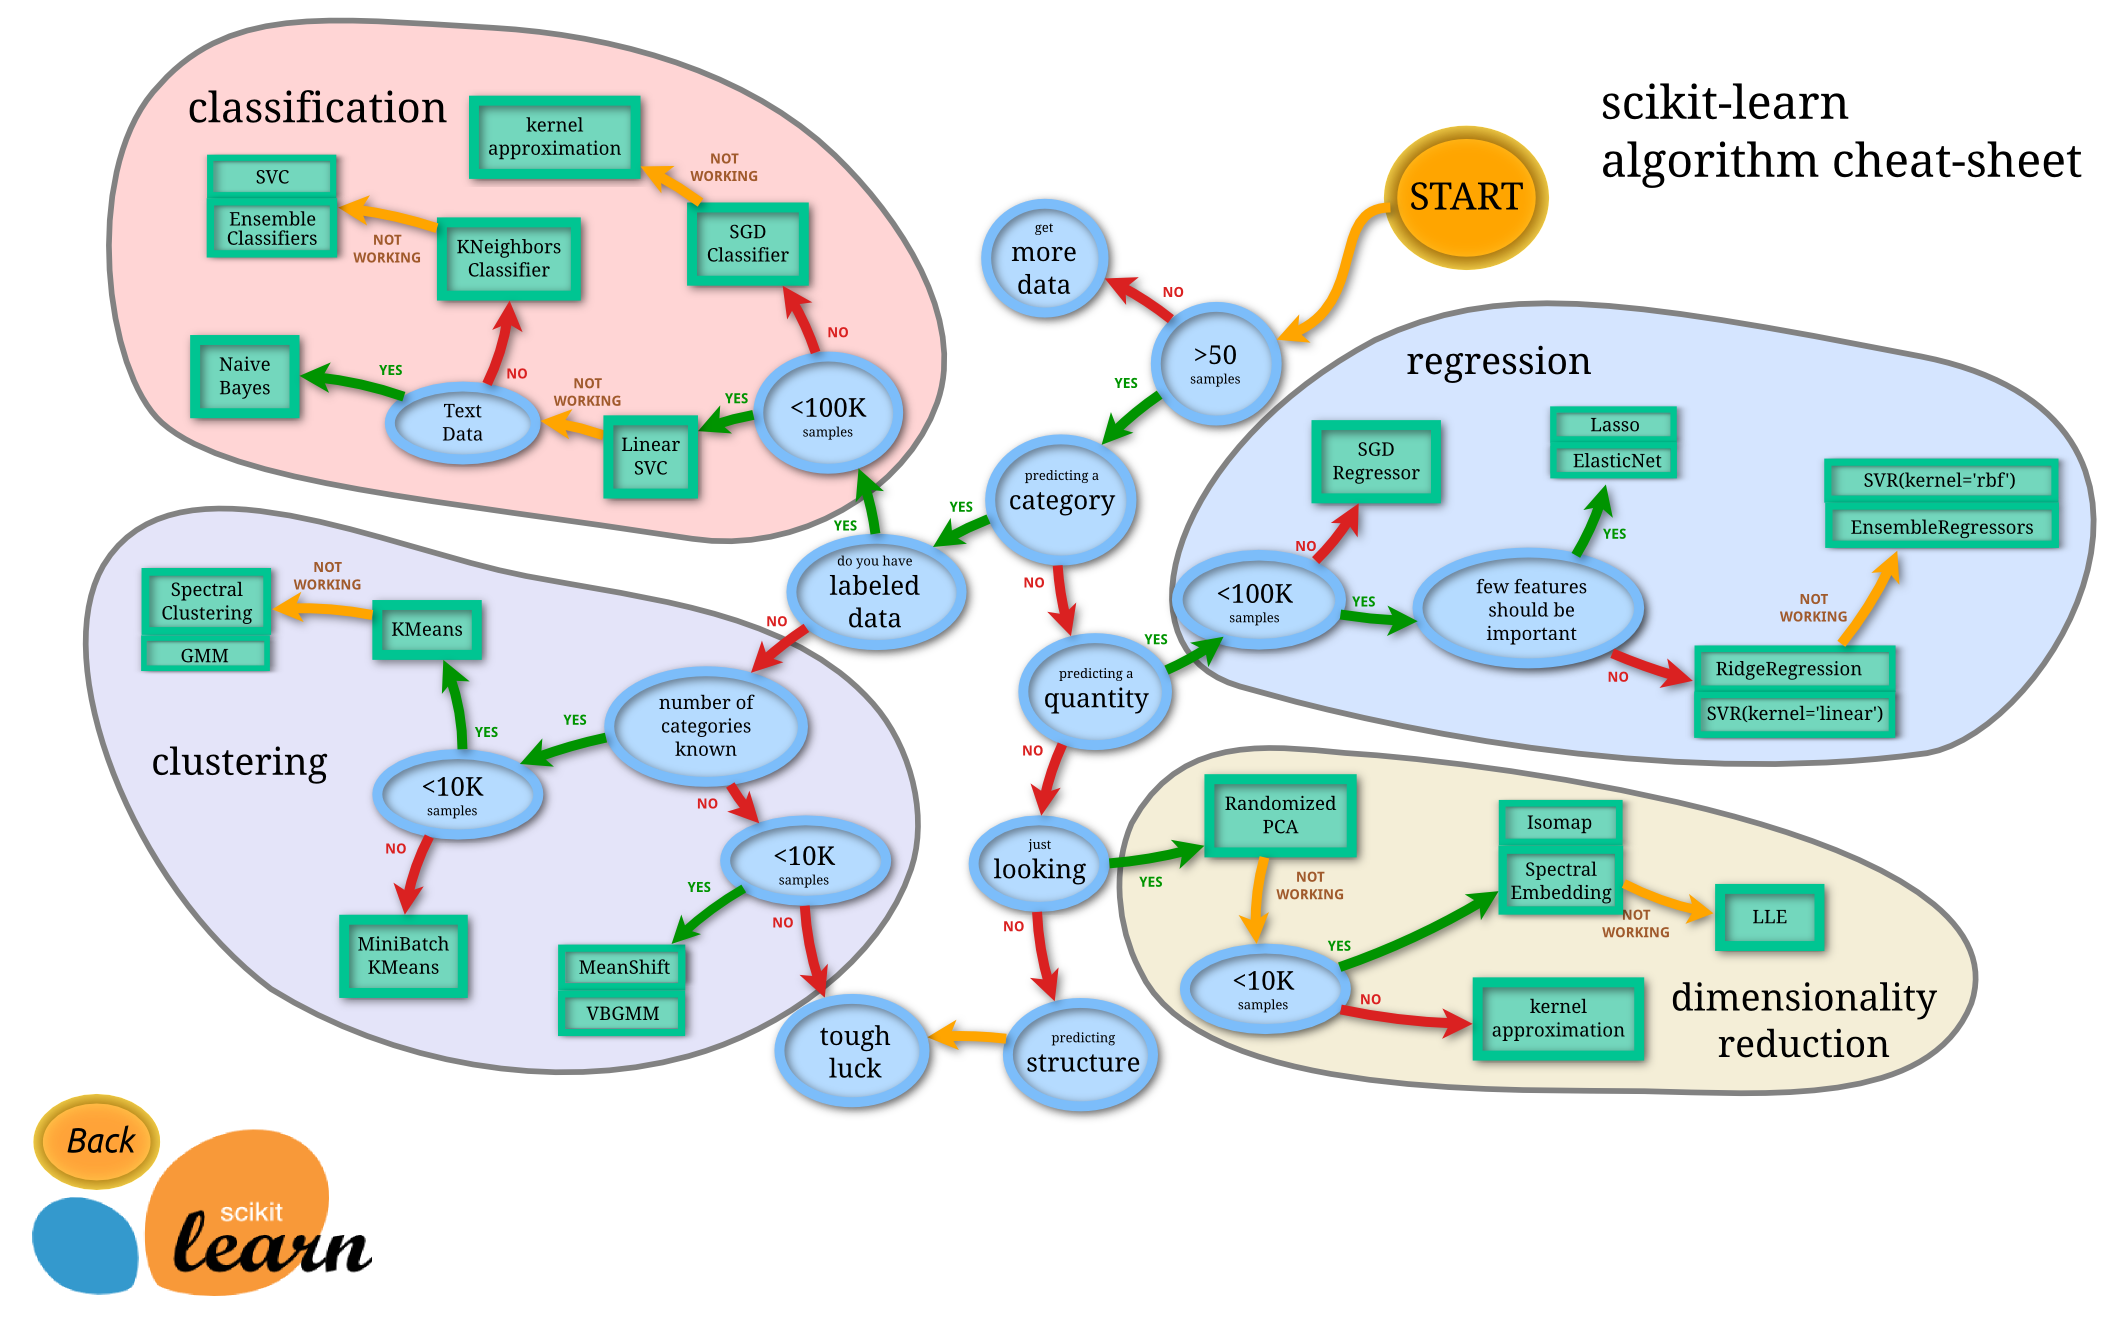

In [20]:
#save the model in Dictionarry
models = {"Logistic Regression": LogisticRegression(),
            "KNearest Neighbor": KNeighborsClassifier(),
            "Random Forest": RandomForestClassifier()}
#Function to fit and score
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluate ML models.
    models : a dictionary of machine learning models.
    X_train : training data without lables.
    y_train : training data labels.
    X_test : test data without labels.
    t_test : test data labels.
    
    """
    #creat dictionary to save and retrun model scores
    model_scores = {}
    #Run the models
    for name , model in models.items():
        model.fit(X_train,y_train)
        #Evaluate the models scores
        model_scores[name] = model.score(X_test,y_test)
    return model_scores

                     accuracy
Logistic Regression  0.885246
KNearest Neighbor    0.688525
Random Forest        0.836066


C:\Users\ShaharCohen\Anaconda3\envs\ml_bootcamp\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

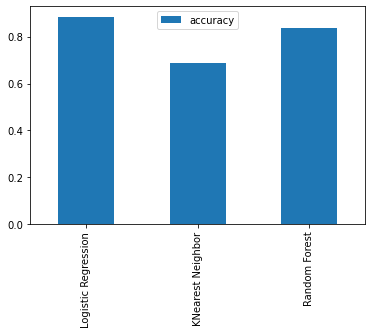

In [21]:
model_score = fit_and_score(models, X_train, X_test, y_train, y_test)
model_score
model_compare = pd.DataFrame(model_score,index = ["accuracy"])
print(model_compare.T)
model_compare.T.plot(kind = "bar")

As we can see from the initial run of the models the Logistic Regression preforms much better then th other models.

Now we can optimize it with tunning hyperparameters

# Logistic Regression 

Logistic regression, despite its name, is a linear model for classification rather than regression. Logistic regression is also known in the literature as logit regression, maximum-entropy classification (MaxEnt) or the log-linear classifier. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function.

Logistic regression is implemented in LogisticRegression. This implementation can fit binary, One-vs-Rest, or multinomial logistic regression with optional 
, 
 or Elastic-Net regularization.
 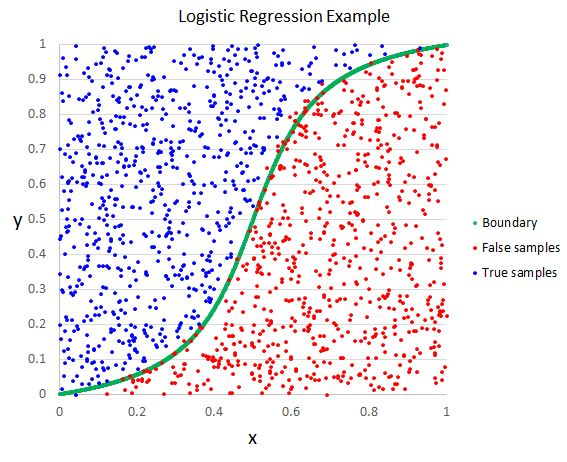

Checking the Following:
* Hyperparameter tunning
* Feature importance
* Confusion matrix
* Precision
* Recall
* F1 score
* Classification Report
* ROC curve
* Area under the curve (AUC)

# Hyperparameter tunning

The maximum accuracy on the test data with KNN is :75.41%


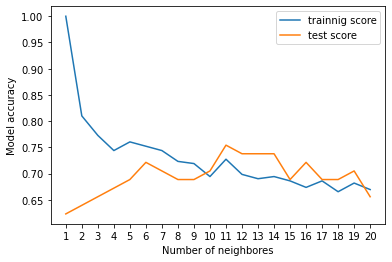

In [22]:
# Tunning KNN classifier
train_scores = []
test_scores = []
# The KNN classifer most importent hyperparameter is the number of neighbros.
# the default is 5 so were going to run through 1-20 and select the one with the highest predicting accuracy.
KNN_model = KNeighborsClassifier()
neighbros_range = range (1,21)
for i in  neighbros_range:
    KNN_model  = KNeighborsClassifier(n_neighbors=i)
    KNN_model.fit(X_train,y_train)
    # Update the training score list
    train_scores.append(KNN_model.score(X_train,y_train))
    # Update the test score list
    test_scores.append(KNN_model.score(X_test,y_test))

# lets plot the scores against the n_neghbros
plt.plot(neighbros_range,train_scores,label = "trainnig score")
plt.plot(neighbros_range,test_scores, label = "test score")
plt.legend()
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbores")
plt.ylabel("Model accuracy")

print(f"The maximum accuracy on the test data with KNN is :{max(test_scores)*100:.2f}%")

## Hyperparameter tunning with RandomizeedSearchCV
Tuning the following:
* LogisticRegression
* RandomForestClassifire

Randomized search on hyper parameters.

RandomizedSearchCV implements a "fit" and a "score" method.
It also implements "predict", "predict_proba", "decision_function",
"transform" and "inverse_transform" if they are implemented in the
estimator used.

The parameters of the estimator used to apply these methods are optimized
by cross-validated search over parameter settings.

In contrast to GridSearchCV, not all parameter values are tried out, but
rather a fixed number of parameter settings is sampled from the specified
distributions. The number of parameter settings that are tried is
given by n_iter.

If all parameters are presented as a list,
sampling without replacement is performed. If at least one parameter
is given as a distribution, sampling with replacement is used.
It is highly recommended to use continuous distributions for continuous
parameters.



In [46]:
# Creat a Hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4,4,20),
              "solver" : ["liblinear"]}
# Creat a Hyperparameter grid for RandimForestClassifier
rf_gif = {"n_estimators": np.arange(10, 1000, 50),
          "max_depth" : [None, 3, 5, 10],
          "min_samples_split" : np.arange(2,20,2),
          "min_samples_leaf" : np.arange(1,20,2)} 
         

After setting up the hyperparameters, Lets tune theme using RandomizeSearchCV 

In [41]:
# Tune Logistics Regression
np.random.seed(42)

# Setup random hyperparameter search for Logistics regression 
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions= log_reg_grid,
                                cv = 5,
                                n_iter= 20,
                                verbose=  True)
#Fit random hyperparameter search for Logistics regression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [42]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [43]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

Do the same thing for RandomForest/

In [47]:
# Tune randomForest
np.random.seed(42)

# Setup random hyperparameter search for Logistics regression 
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions= rf_gif,
                                cv = 5,
                                n_iter= 20,
                                verbose=  True)
#Fit random hyperparameter search for Logistics regression
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.1min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [48]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [50]:
# Evaluate the RandomeForestclassifir with Random grid search
rs_rf.score(X_test,y_test)

0.8688524590163934

## Hyperparameters tunning with GridSearcCV
As we can see the model that preforms the best is the LogisticsRegression, so were going to continue with it.

GrideSearchCV:
Exhaustive search over specified parameter values for an estimator.

Important members are fit, predict.

GridSearchCV implements a “fit” and a “score” method. It also implements “score_samples”, “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [58]:
# Diffrent parammeteres for the LogisticRegression model.

log_reg_grid = {"C": np.logspace(-4,4,30),
              "solver" : ["liblinear"]}

# Set up grid hyperparameters search for Logistics Regression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid= log_reg_grid,
                         cv = 5,
                         verbose=20)

# Fit our grid hyperparamteers search model.
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] C=0.0001, solver=liblinear ......................................
[CV] .......... C=0.0001, solver=liblinear, score=0.653, total=   0.0s
[CV] C=0.0001, solver=liblinear ......................................
[CV] .......... C=0.0001, solver=liblinear, score=0.633, total=   0.0s
[CV] C=0.0001, solver=liblinear ......................................
[CV] .......... C=0.0001, solver=liblinear, score=0.625, total=   0.0s
[CV] C=0.0001, solver=liblinear ......................................
[CV] .......... C=0.0001, solver=liblinear, score=0.604, total=   0.0s
[CV] C=0.0001, solver=liblinear ......................................
[CV] .......... C=0.0001, solver=liblinear, score=0.750, total=   0.0s
[CV] C=0.00018873918221350977, solver=liblinear ......................
[CV]  C=0.00018873918221350977, solver=liblinear, score=0.694, total=   0.0s
[CV] C=0.00018873918221350977, solver=liblinear ......................
[CV]  C=0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  

[CV]  C=0.002395026619987486, solver=liblinear, score=0.708, total=   0.0s
[CV] C=0.002395026619987486, solver=liblinear ........................
[CV]  C=0.002395026619987486, solver=liblinear, score=0.604, total=   0.0s
[CV] C=0.002395026619987486, solver=liblinear ........................
[CV]  C=0.002395026619987486, solver=liblinear, score=0.729, total=   0.0s
[CV] C=0.004520353656360241, solver=liblinear ........................
[CV]  C=0.004520353656360241, solver=liblinear, score=0.755, total=   0.0s
[CV] C=0.004520353656360241, solver=liblinear ........................
[CV]  C=0.004520353656360241, solver=liblinear, score=0.694, total=   0.0s
[CV] C=0.004520353656360241, solver=liblinear ........................
[CV]  C=0.004520353656360241, solver=liblinear, score=0.708, total=   0.0s
[CV] C=0.004520353656360241, solver=liblinear ........................
[CV]  C=0.004520353656360241, solver=liblinear, score=0.604, total=   0.0s
[CV] C=0.004520353656360241, solver=liblinear ...

[CV]  C=9.236708571873866, solver=liblinear, score=0.833, total=   0.0s
[CV] C=9.236708571873866, solver=liblinear ...........................
[CV]  C=9.236708571873866, solver=liblinear, score=0.771, total=   0.0s
[CV] C=17.433288221999874, solver=liblinear ..........................
[CV]  C=17.433288221999874, solver=liblinear, score=0.776, total=   0.0s
[CV] C=17.433288221999874, solver=liblinear ..........................
[CV]  C=17.433288221999874, solver=liblinear, score=0.898, total=   0.0s
[CV] C=17.433288221999874, solver=liblinear ..........................
[CV]  C=17.433288221999874, solver=liblinear, score=0.771, total=   0.0s
[CV] C=17.433288221999874, solver=liblinear ..........................
[CV]  C=17.433288221999874, solver=liblinear, score=0.833, total=   0.0s
[CV] C=17.433288221999874, solver=liblinear ..........................
[CV]  C=17.433288221999874, solver=liblinear, score=0.771, total=   0.0s
[CV] C=32.90344562312671, solver=liblinear ......................

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.9s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=20)

In [59]:
# Evaluate the gride search
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [60]:
gd_log_reg.score(X_test,y_test)

0.8852459016393442

## Evaluating our tuned machine leanrning classifier

* Confusion matrix
* Precision
* Recall
* F1 score
* Classification Report
* ROC curve
* Area under the curve (AUC)

In [62]:
# Make prefictions
y_pred = gs_log_reg.predict(X_test)

### ROC curve

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. 

This curve plots two parameters:

* True Positive Rate
* False Positive Rate

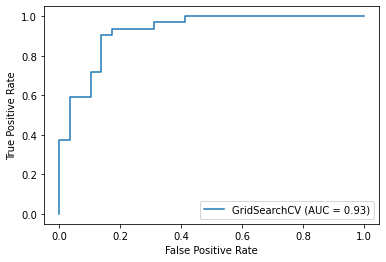

In [70]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg,X_test,y_test)


In [64]:
# Confusion matrix
print(confusion_matrix(y_test,y_pred))

[[25  4]
 [ 3 29]]


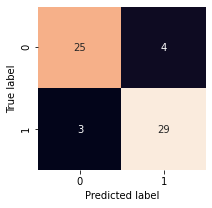

In [68]:
# Plotting a nicer Confusion Maxtrix
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test,y_pred)

After finding ROC curve and confusion matrix,
let's get the classification report as wel as a crossvalidation pression.

In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculate evaluation matrics using cross-validation



sklearn.model_selection.cross_val_score:

Evaluate a score by cross-validation

Read more in the User Guide.

In [73]:
#check best hyperparameters
gd_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [80]:
# Creart a new classifier with best parameters
clf = LogisticRegression(C = 0.20433597178569418,
                        solver='liblinear')

In [100]:
def cv_evaluate(model, X, y,cv_folds,scorings ):
    cv_eval = {}
    for score_method in scorings:
        cv_ev = cross_val_score(model,
                       X,
                       y,
                       cv = cv_folds,
                       scoring = score_method)
        cv_eval[score_method]  = cv_ev.mean()
        
    return cv_eval

evaluating_methods = ["accuracy","precision","recall", "f1" ]
cv_evaluate  = cv_evaluate(clf, X, y,5,evaluating_methods )
cv_evaluate
    

{'accuracy': 0.8446994535519124,
 'precision': 0.8207936507936507,
 'recall': 0.9212121212121213,
 'f1': 0.8673007976269721}

In [111]:
# Visualize the crossvaliadtion evaluation
cv_metrics = pd.DataFrame([cv_evaluate],columns=cv_evaluate.keys())
cv_metrics

,accuracy,precision,recall,f1
0,0.844699,0.820794,0.921212,0.867301


<AxesSubplot:title={'center':'Cross validation classification matrics'}>

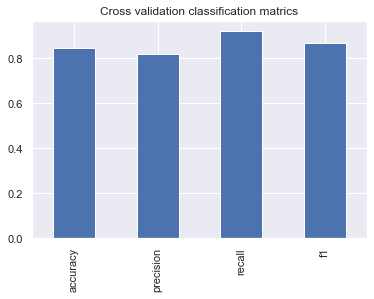

In [119]:
cv_metrics.T.plot(kind = "bar",
               title = "Cross validation classification matrics",
               legend = False)

### Feature importence

Let's find out whate features contribute to know whether or not the patient has heart disease.

In [124]:
# Creart a new instance of the classifier with best parameters
clf = LogisticRegression(C = 0.20433597178569418,
                        solver='liblinear')
clf.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [125]:
# Check coef_
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [129]:
# Match the coef's to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

<AxesSubplot:title={'center':'Feature importence'}>

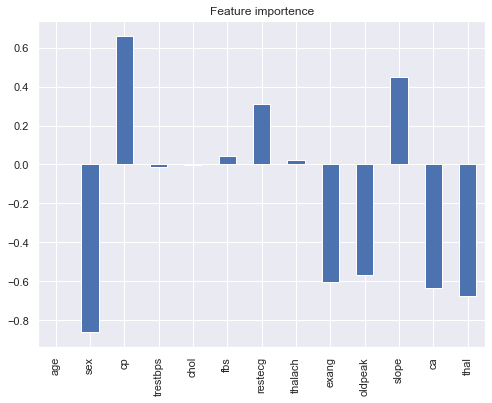

In [140]:
# Visualize feature importence 
feature_df = pd.DataFrame([feature_dict],columns=feature_dict.keys())
feature_df.T.plot(kind = "bar",
               title = "Feature importence",
               legend = False,
                 figsize = (8,6))
